# [Individual Repository-level Analyses]

In [1]:
# For each repository, analyze bandit’s output
# by scanning all the python files across commits.
# (a) Report the number of HIGH, MEDIUM and LOW confidence issues the tool
# identifies per commit.
# (b) Report the number of HIGH, MEDIUM and LOW severity issues the tool
# identifies per commit.
# (c) Report the unique CWEs2

# the tool identifies per commit.

PSUTIL

In [2]:
# read the example file psutil_bandit/v0.json 
import json
import os
import re
import sys

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

json_file_data = read_json_file('psutil_bandit/v0.json')
print(json_file_data)

{'errors': [], 'generated_at': '2025-03-07T10:21:34Z', 'metrics': {'_totals': {'CONFIDENCE.HIGH': 379, 'CONFIDENCE.LOW': 0, 'CONFIDENCE.MEDIUM': 2, 'CONFIDENCE.UNDEFINED': 0, 'SEVERITY.HIGH': 1, 'SEVERITY.LOW': 366, 'SEVERITY.MEDIUM': 14, 'SEVERITY.UNDEFINED': 0, 'loc': 22522, 'nosec': 0, 'skipped_tests': 0}, 'psutil_results/v0/docs/conf.py': {'CONFIDENCE.HIGH': 2, 'CONFIDENCE.LOW': 0, 'CONFIDENCE.MEDIUM': 0, 'CONFIDENCE.UNDEFINED': 0, 'SEVERITY.HIGH': 0, 'SEVERITY.LOW': 2, 'SEVERITY.MEDIUM': 0, 'SEVERITY.UNDEFINED': 0, 'loc': 64, 'nosec': 0, 'skipped_tests': 0}, 'psutil_results/v0/psutil/__init__.py': {'CONFIDENCE.HIGH': 4, 'CONFIDENCE.LOW': 0, 'CONFIDENCE.MEDIUM': 0, 'CONFIDENCE.UNDEFINED': 0, 'SEVERITY.HIGH': 0, 'SEVERITY.LOW': 4, 'SEVERITY.MEDIUM': 0, 'SEVERITY.UNDEFINED': 0, 'loc': 1813, 'nosec': 0, 'skipped_tests': 0}, 'psutil_results/v0/psutil/_common.py': {'CONFIDENCE.HIGH': 5, 'CONFIDENCE.LOW': 0, 'CONFIDENCE.MEDIUM': 0, 'CONFIDENCE.UNDEFINED': 0, 'SEVERITY.HIGH': 0, 'SEVERITY

In [3]:
json_file_data.keys()

dict_keys(['errors', 'generated_at', 'metrics', 'results'])

In [4]:
json_file_data['metrics'].keys()

dict_keys(['_totals', 'psutil_results/v0/docs/conf.py', 'psutil_results/v0/psutil/__init__.py', 'psutil_results/v0/psutil/_common.py', 'psutil_results/v0/psutil/_compat.py', 'psutil_results/v0/psutil/_psaix.py', 'psutil_results/v0/psutil/_psbsd.py', 'psutil_results/v0/psutil/_pslinux.py', 'psutil_results/v0/psutil/_psosx.py', 'psutil_results/v0/psutil/_psposix.py', 'psutil_results/v0/psutil/_pssunos.py', 'psutil_results/v0/psutil/_pswindows.py', 'psutil_results/v0/psutil/tests/__init__.py', 'psutil_results/v0/psutil/tests/__main__.py', 'psutil_results/v0/psutil/tests/runner.py', 'psutil_results/v0/psutil/tests/test_aix.py', 'psutil_results/v0/psutil/tests/test_bsd.py', 'psutil_results/v0/psutil/tests/test_connections.py', 'psutil_results/v0/psutil/tests/test_contracts.py', 'psutil_results/v0/psutil/tests/test_linux.py', 'psutil_results/v0/psutil/tests/test_memleaks.py', 'psutil_results/v0/psutil/tests/test_misc.py', 'psutil_results/v0/psutil/tests/test_osx.py', 'psutil_results/v0/psuti

In [5]:
json_file_data['metrics']['_totals'] #This will be for the parts a and b.

{'CONFIDENCE.HIGH': 379,
 'CONFIDENCE.LOW': 0,
 'CONFIDENCE.MEDIUM': 2,
 'CONFIDENCE.UNDEFINED': 0,
 'SEVERITY.HIGH': 1,
 'SEVERITY.LOW': 366,
 'SEVERITY.MEDIUM': 14,
 'SEVERITY.UNDEFINED': 0,
 'loc': 22522,
 'nosec': 0,
 'skipped_tests': 0}

In [6]:
json_file_data['results'] #This will be for the part c.

[{'code': "45                 ret = ast.literal_eval(line.strip().split(' = ')[1])\n46                 assert ret.count('.') == 2, ret\n47                 for num in ret.split('.'):\n",
  'col_offset': 16,
  'end_col_offset': 47,
  'filename': 'psutil_results/v0/docs/conf.py',
  'issue_confidence': 'HIGH',
  'issue_cwe': {'id': 703,
   'link': 'https://cwe.mitre.org/data/definitions/703.html'},
  'issue_severity': 'LOW',
  'issue_text': 'Use of assert detected. The enclosed code will be removed when compiling to optimised byte code.',
  'line_number': 46,
  'line_range': [46],
  'more_info': 'https://bandit.readthedocs.io/en/1.8.3/plugins/b101_assert_used.html',
  'test_id': 'B101',
  'test_name': 'assert_used'},
 {'code': "47                 for num in ret.split('.'):\n48                     assert num.isdigit(), ret\n49                 return ret\n",
  'col_offset': 20,
  'end_col_offset': 45,
  'filename': 'psutil_results/v0/docs/conf.py',
  'issue_confidence': 'HIGH',
  'issue_cwe'

In [7]:
# The length of the results will be the number of issues found in the commit. 
print(len(json_file_data['results']))

381


In [8]:
# Performing the same operations for the other json files, v0 to v99.json and soring the results in a dictionary.
# The dictionary will have the version number as key and the metrics and results as values.
# This is for part a and b, where the result of json_file_data['metrics']['_totals'] #This will be for the parts a and b. is {'CONFIDENCE.HIGH': 379,
#  'CONFIDENCE.LOW': 0,
#  'CONFIDENCE.MEDIUM': 2,
#  'CONFIDENCE.UNDEFINED': 0,
#  'SEVERITY.HIGH': 1,
#  'SEVERITY.LOW': 366,
#  'SEVERITY.MEDIUM': 14,
#  'SEVERITY.UNDEFINED': 0,

# and for part c, the answer is in print(len(json_file_data['results']))

def analyse_versions(folder_path):
    versions_list = []
    for i in range(100):
        json_file_data = read_json_file(folder_path + '/v' + str(i) + '.json')
        versions_list.append(json_file_data)
    confidence_high = []
    confidence_medium = []
    confidence_low = []
    confidence_undefined = []
    severity_high = []
    severity_medium = []
    severity_low = []
    severity_undefined = []
    unique_cwes = []

    for version in versions_list:
        confidence_high.append(version['metrics']['_totals']['CONFIDENCE.HIGH'])
        confidence_medium.append(version['metrics']['_totals']['CONFIDENCE.MEDIUM'])
        confidence_low.append(version['metrics']['_totals']['CONFIDENCE.LOW'])
        confidence_undefined.append(version['metrics']['_totals']['CONFIDENCE.UNDEFINED'])
        severity_high.append(version['metrics']['_totals']['SEVERITY.HIGH'])
        severity_medium.append(version['metrics']['_totals']['SEVERITY.MEDIUM'])
        severity_low.append(version['metrics']['_totals']['SEVERITY.LOW'])
        severity_undefined.append(version['metrics']['_totals']['SEVERITY.UNDEFINED'])
        unique_cwes.append(len(version['results']))

    return {'confidence_high': confidence_high, 'confidence_medium': confidence_medium, 'confidence_low': confidence_low, 'confidence_undefined': confidence_undefined, 'severity_high': severity_high, 'severity_medium': severity_medium, 'severity_low': severity_low, 'severity_undefined': severity_undefined, 'unique_cwes': unique_cwes}




In [9]:
versions_data = analyse_versions('psutil_bandit')

In [10]:
# provide the results in a table format. the version number should be the index and the columns should be the metrics and results.
import pandas as pd

df = pd.DataFrame(versions_data)
df

confidence_high  confidence_medium  confidence_low  confidence_undefined  \
0               379                  2               0                     0   
1               379                  2               0                     0   
2               379                  2               0                     0   
3               379                  2               0                     0   
4               379                  2               0                     0   
..              ...                ...             ...                   ...   
95             1723                  2               0                     0   
96             1723                  2               0                     0   
97             1723                  2               0                     0   
98             1723                  2               0                     0   
99             1723                  2               0                     0   

    severity_high  severity_medium  severity_low  severity_undefined  \
0               1               14           366                   0   
1               1               14           366                   0   
2               1               14           366                   0   
3               1               14           366                   0   
4               1               14           366                   0   
..            ...              ...           ...                 ...   
95              1               14          1710                   0   
96              1               14          1710                   0   
97              1               14          1710                   0   
98              1               14          1710                   0   
99              1               14          1710                   0   

    unique_cwes  
0           381  
1           381  
2           381  
3           381  
4           381  
..          ...  
95         1725  
96         1725  
97         1725  
98         1725  
99         1725  

[100 rows x 9 columns]

In [11]:
# Now, we will save it as a csv file
df.to_csv('psutil_bandit_results.csv')

In [12]:
# Now, we will plot the confidence per version. The x-axis will be the version number and the y-axis will be the number of issues found. We will plot the HIGH, MEDIUM and LOW  and UNDEFINED confidence issues.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Confidence of Issues Per Version')
plt.legend()

plt.show()

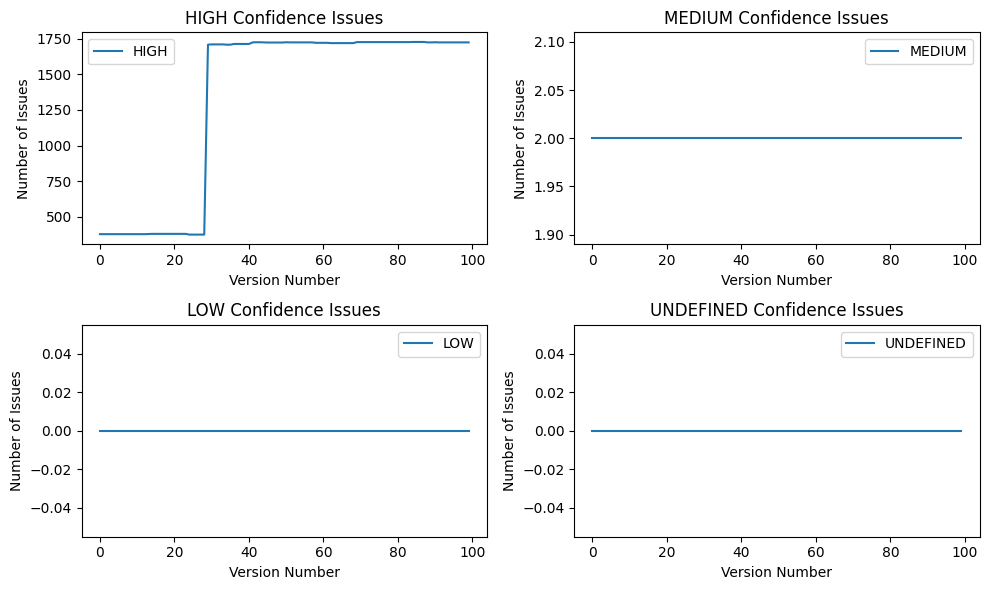

In [13]:
# Now, we will also do subplot 2,2 for the each level of confidence.
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Confidence Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Confidence Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Confidence Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Confidence Issues')
plt.legend()

plt.tight_layout()
plt.show()


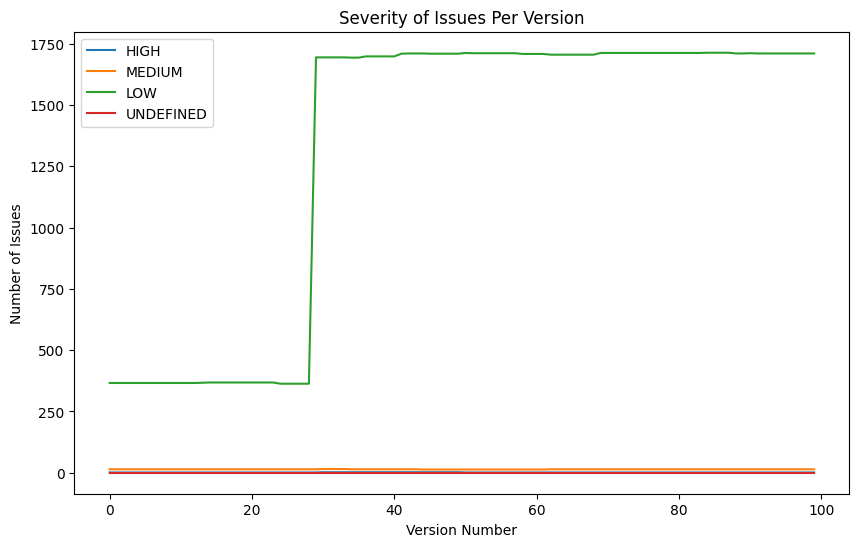

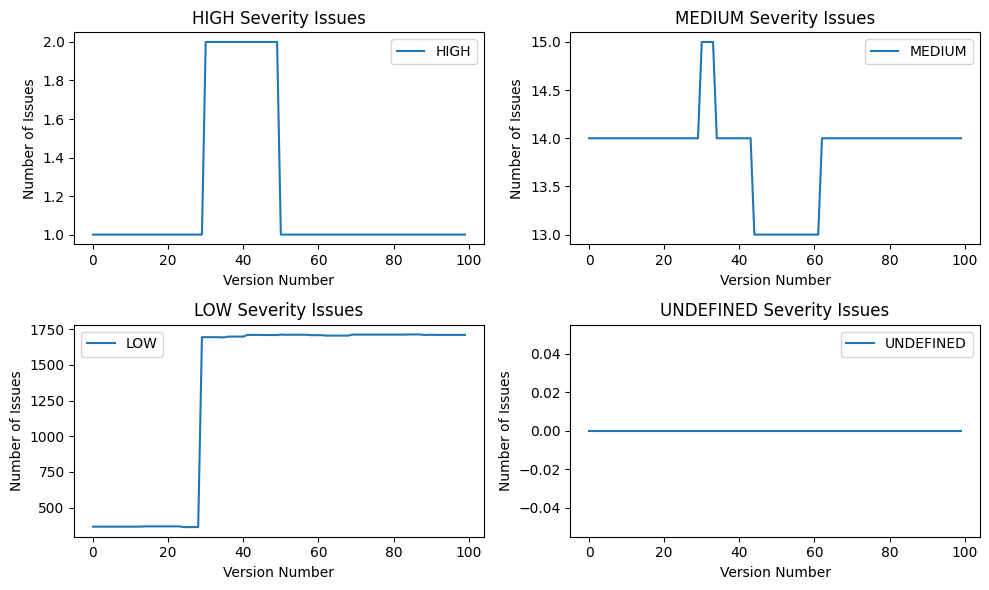

In [14]:
# Similarly, performing this analysis for the severity of the issues.
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.plot(df.index, df['severity_low'], label='LOW')
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Severity of Issues Per Version')
plt.legend()

plt.show()

# Now, we will also do subplot 2,2 for the each level of severity.
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Severity Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Severity Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['severity_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Severity Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Severity Issues')
plt.legend()

plt.tight_layout()
plt.show()




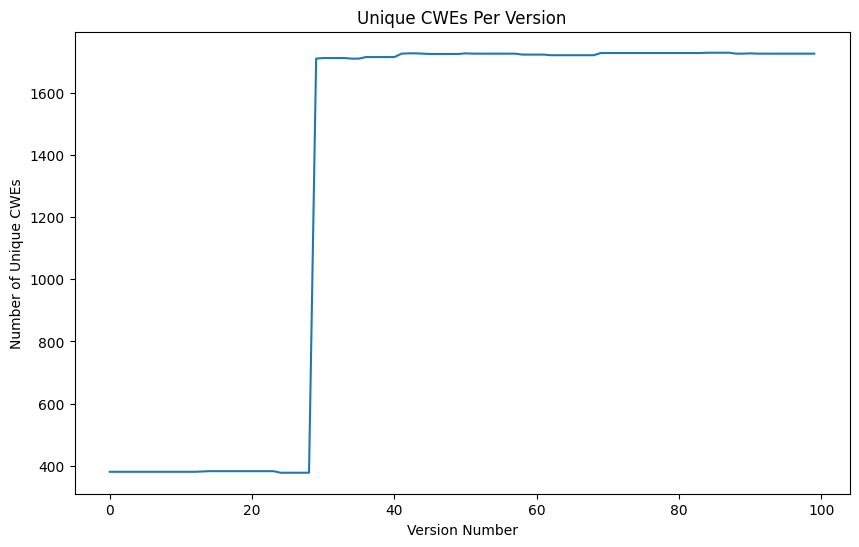

In [15]:
# Now, we will plot the unique CWEs per version. The x-axis will be the version number and the y-axis will be the number of unique CWEs found.
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['unique_cwes'])
plt.xlabel('Version Number')
plt.ylabel('Number of Unique CWEs')
plt.title('Unique CWEs Per Version')

plt.show()


Pytest

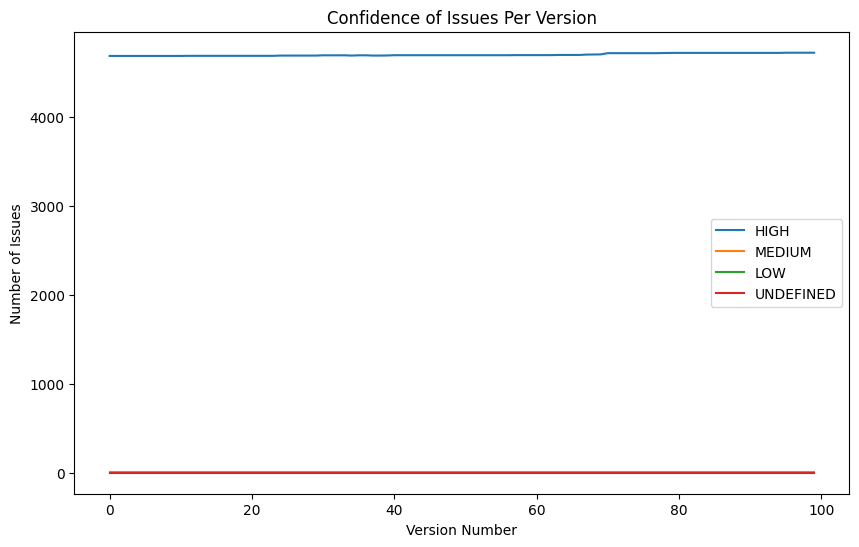

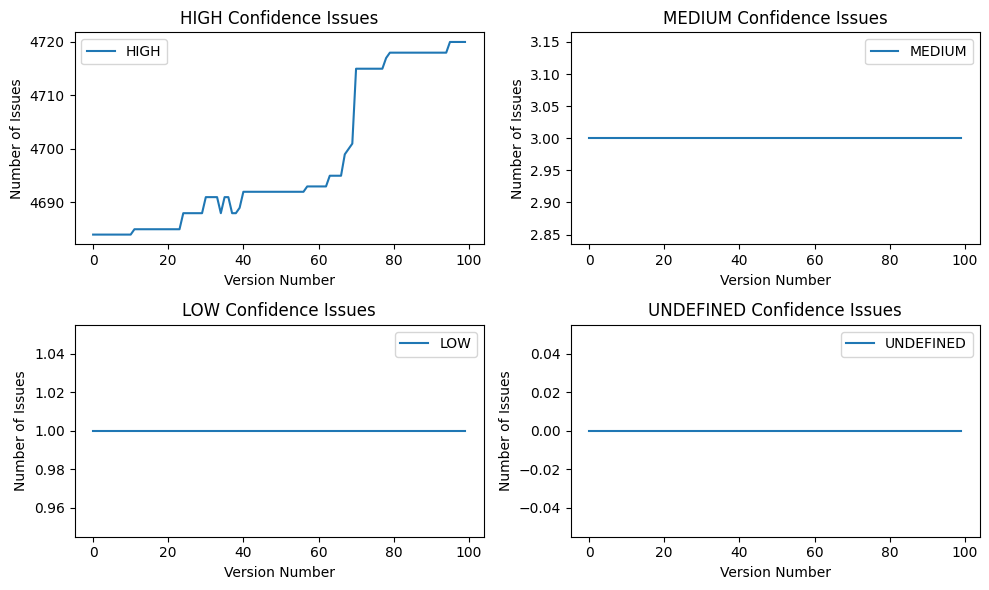

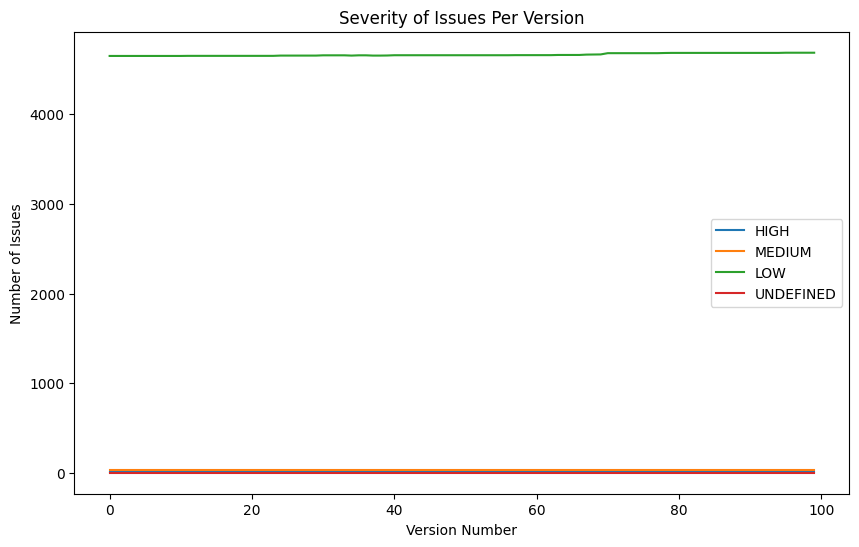

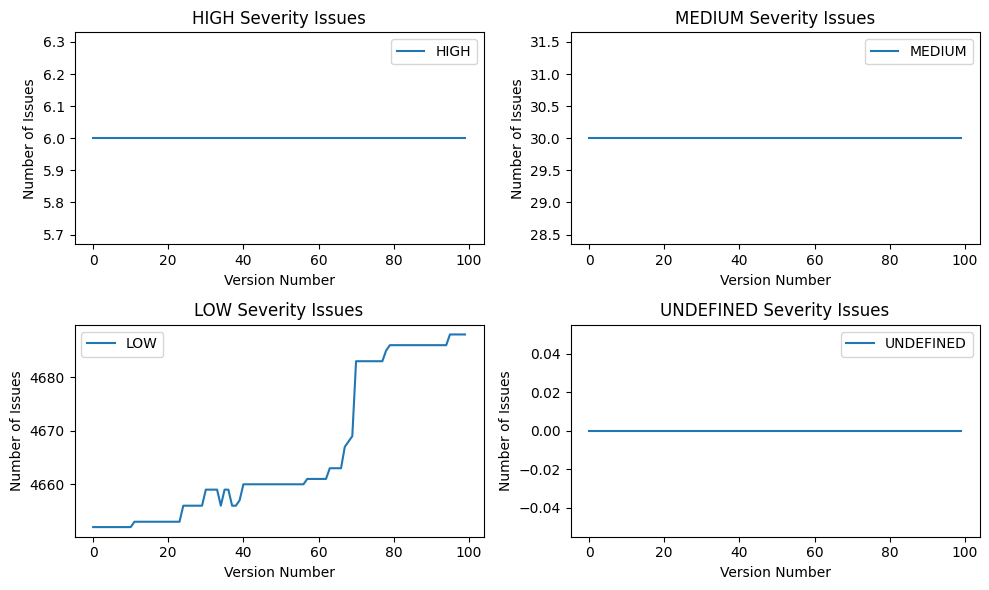

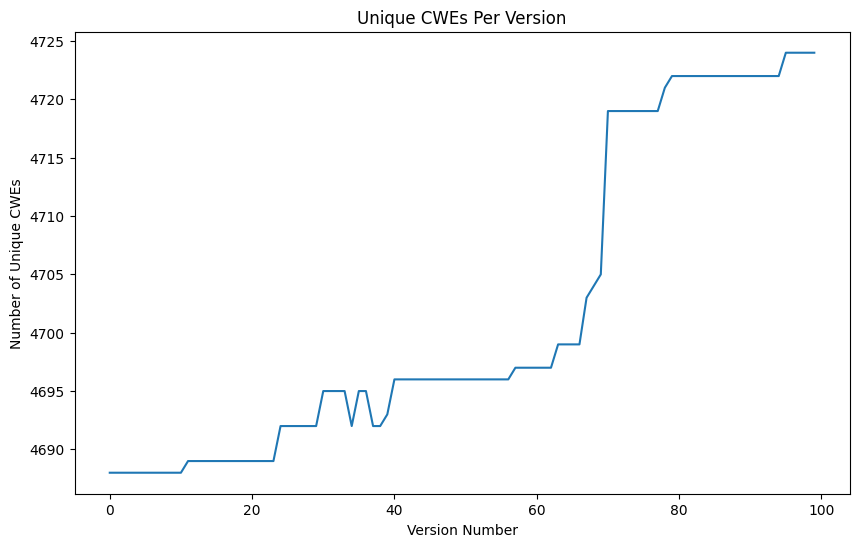

In [16]:
# We will now perform the same analysis for the pytest repository
versions_data = analyse_versions('pytest_bandit')

df = pd.DataFrame(versions_data)
df

df.to_csv('pytest_bandit_results.csv')

plt.figure(figsize=(10, 6))

plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Confidence of Issues Per Version')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Confidence Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Confidence Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Confidence Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Confidence Issues')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.plot(df.index, df['severity_low'], label='LOW')
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Severity of Issues Per Version')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Severity Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Severity Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['severity_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Severity Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Severity Issues')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['unique_cwes'])
plt.xlabel('Version Number')
plt.ylabel('Number of Unique CWEs')
plt.title('Unique CWEs Per Version')

plt.show()





Scrapy

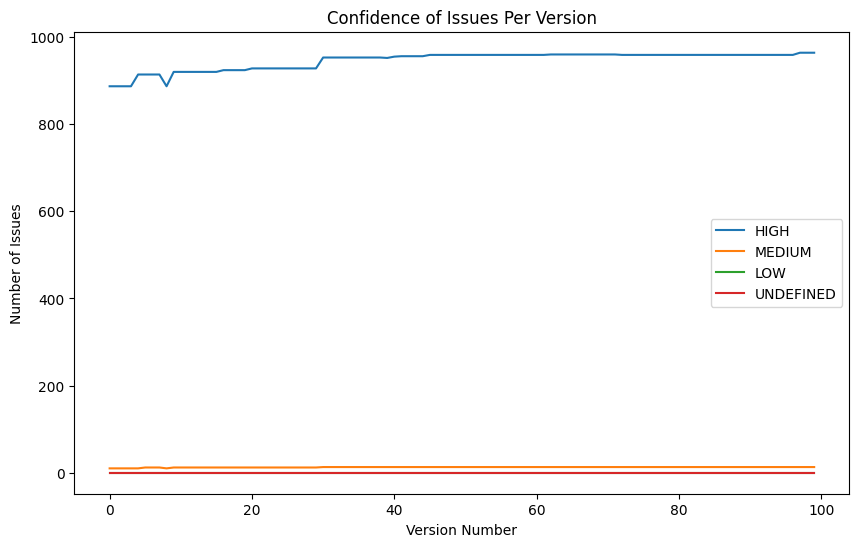

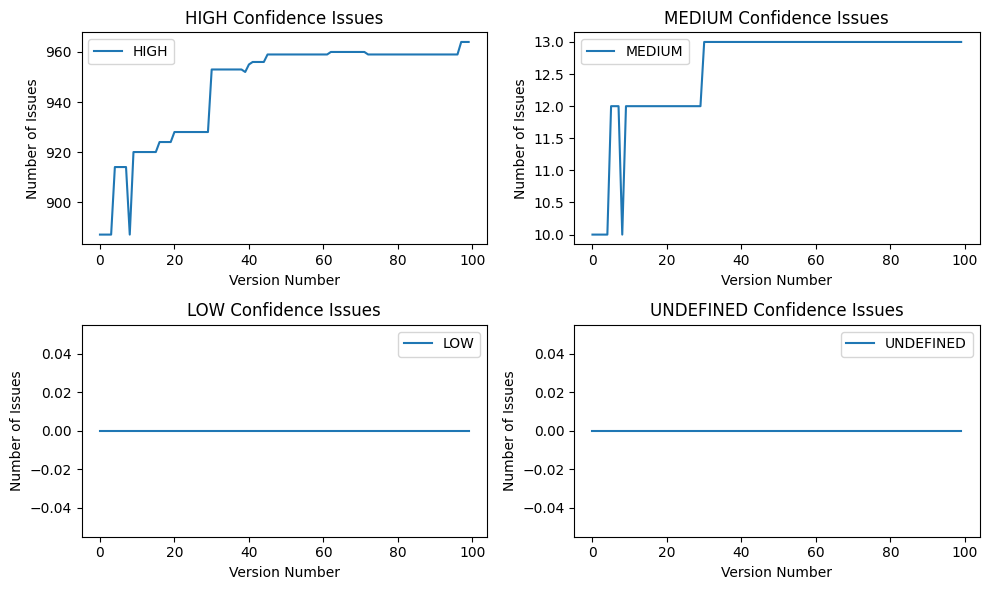

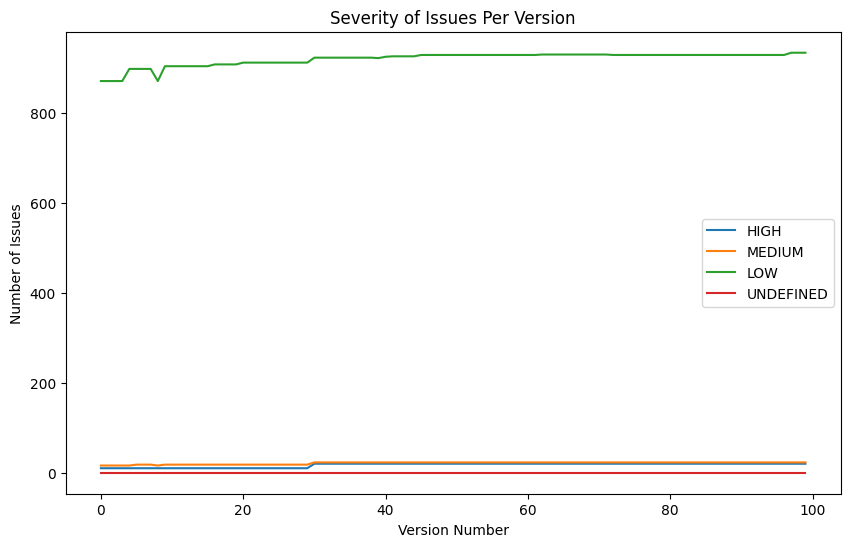

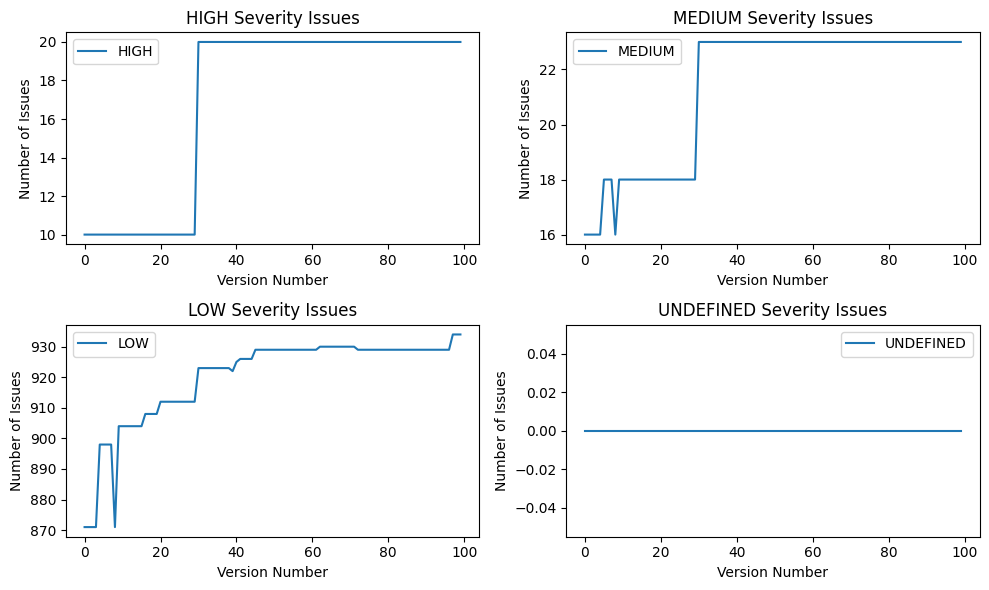

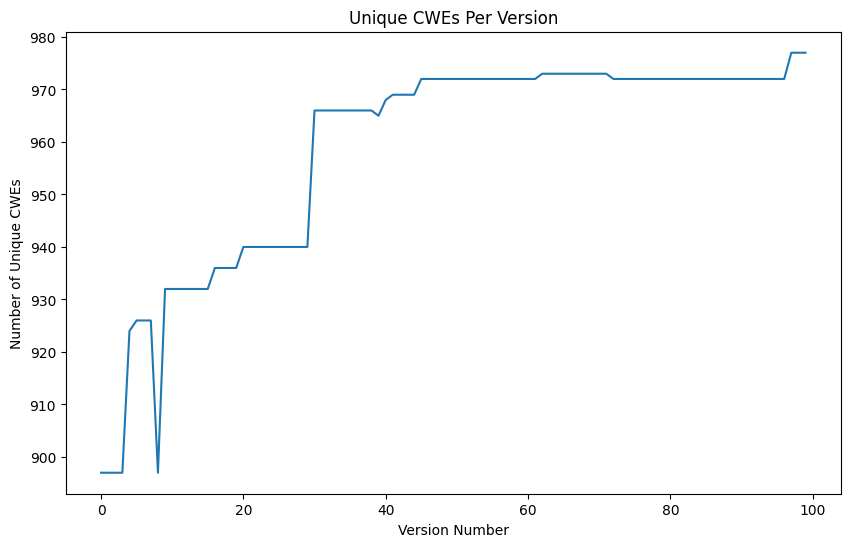

In [17]:
# We will now perform the same analysis for the scrapy repository
versions_data = analyse_versions('scrapy_bandit')

df = pd.DataFrame(versions_data)
df

df.to_csv('scrapy_bandit_results.csv')

plt.figure(figsize=(10, 6))

plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Confidence of Issues Per Version')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['confidence_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Confidence Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['confidence_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Confidence Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['confidence_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Confidence Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['confidence_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Confidence Issues')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.plot(df.index, df['severity_low'], label='LOW')
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('Severity of Issues Per Version')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['severity_high'], label='HIGH')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('HIGH Severity Issues')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['severity_medium'], label='MEDIUM')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('MEDIUM Severity Issues')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['severity_low'], label='LOW')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('LOW Severity Issues')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['severity_undefined'], label='UNDEFINED')
plt.xlabel('Version Number')
plt.ylabel('Number of Issues')
plt.title('UNDEFINED Severity Issues')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['unique_cwes'])
plt.xlabel('Version Number')
plt.ylabel('Number of Unique CWEs')
plt.title('Unique CWEs Per Version')

plt.show()





# RQs

In [ ]:
# For all the repositories, across all the commits, if there a high severity issue intorduced, store the introductory commit version in the dictionary if it does not exist. If it existed and is not in the current commit, store the fixing commit version in the dictionary.
# from difflib import SequenceMatcher
import Levenshtein #https://www.geeksforgeeks.org/python-similarity-metrics-of-strings/

import tqdm

def analyze_rq1(repo_paths):

    high_introductions = {}
    high_fixes = {}

    for repo_path in repo_paths:
        for i in tqdm.tqdm(range(100)):
            filepath = os.path.join(repo_path, f"v{i}.json")
            with open(filepath, "r") as f:
                data = json.load(f)

            # for issue in data["results"]: Add tqdm
            for issue in data["results"]:
                if issue["issue_severity"] == "HIGH":
                    # if issue["code"] not in high_introductions:
                    #     high_introductions[issue["code"]] = i
                    # for issue_code in high_introductions.keys():
                    #     if issue_code not in high_fixes and issue_code != issue["code"] and issue["code"] in issue_code:
                    #         high_fixes[issue_code] = i
                    # Instead of using not in and in, use the similarity notion to be grater than 0.8 to consider the issue as the same.
                    # Adding to the high_introductions dictionary.
                    in_intro = False
                    for issue_code in high_introductions.keys():
                        if Levenshtein.ratio(issue_code, issue["code"]) > 0.9:
                            in_intro = True
                            break
                    if not in_intro:
                        high_introductions[issue["code"]] = i
                    # Adding to the high_fixes dictionary.
                    for issue_code in high_introductions.keys():
                        # if Levenshtein.ratio(issue_code, issue["code"]) > 0.9 and issue_code != issue["code"]:
                        #     high_fixes[issue_code] = i
                        # This condition is: if the issue code is not in the high_fixes dictionary and the issue code is not similar to any of the issue codes in the current version, then add it to the high_fixes dictionary.
                        if issue_code not in high_fixes:
                            in_fix = False
                            for issue_version in data["results"]:
                                if Levenshtein.ratio(issue_code, issue_version["code"]) > 0.9:
                                    in_fix = True
                                    break
                            if not in_fix:
                                # Check if the introduction version is less than the current version, then add it to the high_fixes dictionary.
                                if high_introductions[issue_code] < i:
                                    high_fixes[issue_code] = i
                                
                                


    return high_introductions, high_fixes

repo_paths = ["psutil_bandit", "pytest_bandit", "scrapy_bandit"]
high_introductions, high_fixes = analyze_rq1(repo_paths)


100%|██████████| 100/100 [00:17<00:00,  5.66it/s]


In [94]:
high_fixes

{'117     p = subprocess.Popen(\n118         cmd, shell=True, env=os.environ, cwd=os.getcwd()  # noqa\n119     )\n120     p.communicate()\n121     if p.returncode != 0:\n': 24,
 '139     p = subprocess.Popen(  # noqa S602\n140         cmd, shell=True, env=os.environ, cwd=os.getcwd()\n141     )\n142     p.communicate()\n143     if p.returncode != 0:\n': 50,
 '51 \n52         code = os.system("%s %s --user --upgrade" % (sys.executable, f.name))\n53 \n': 64,
 '43 \n44         code = os.system(f"{sys.executable} {f.name} --user --upgrade")\n45 \n': 65,
 '585         fn.write(data, mode="wb")\n586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n': 1,
 '586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n588         with pytest.raises(ValueError):\n': 1,
 '389     loader = jinja2.FileSystemLoader(str(tmp_path))\n390     env = ji

In [95]:
high_introductions

{'117     p = subprocess.Popen(\n118         cmd, shell=True, env=os.environ, cwd=os.getcwd()  # noqa\n119     )\n120     p.communicate()\n121     if p.returncode != 0:\n': 0,
 '139     p = subprocess.Popen(  # noqa S602\n140         cmd, shell=True, env=os.environ, cwd=os.getcwd()\n141     )\n142     p.communicate()\n143     if p.returncode != 0:\n': 24,
 '51 \n52         code = os.system("%s %s --user --upgrade" % (sys.executable, f.name))\n53 \n': 30,
 '43 \n44         code = os.system(f"{sys.executable} {f.name} --user --upgrade")\n45 \n': 64,
 '585         fn.write(data, mode="wb")\n586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n': 0,
 '586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n588         with pytest.raises(ValueError):\n': 0,
 '389     loader = jinja2.FileSystemLoader(str(tmp_path))\n390     env = jin

In [87]:
len(high_introductions), len(high_fixes)

(29, 10)

In [96]:
# For all the unique issue codes in both the dictionaries, create a dictionary mapping of the issue code to the id number of that issue starting from 0.

def create_issue_code_mapping(high_introductions, high_fixes):
    issue_code_mapping = {}
    for issue_code in high_introductions.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    for issue_code in high_fixes.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    return issue_code_mapping

issue_code_mapping = create_issue_code_mapping(high_introductions, high_fixes)

issue_code_mapping

{'117     p = subprocess.Popen(\n118         cmd, shell=True, env=os.environ, cwd=os.getcwd()  # noqa\n119     )\n120     p.communicate()\n121     if p.returncode != 0:\n': 0,
 '139     p = subprocess.Popen(  # noqa S602\n140         cmd, shell=True, env=os.environ, cwd=os.getcwd()\n141     )\n142     p.communicate()\n143     if p.returncode != 0:\n': 1,
 '51 \n52         code = os.system("%s %s --user --upgrade" % (sys.executable, f.name))\n53 \n': 2,
 '43 \n44         code = os.system(f"{sys.executable} {f.name} --user --upgrade")\n45 \n': 3,
 '585         fn.write(data, mode="wb")\n586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n': 4,
 '586         assert fn.computehash("md5") == md5(data).hexdigest()\n587         assert fn.computehash("sha1") == sha(data).hexdigest()\n588         with pytest.raises(ValueError):\n': 5,
 '389     loader = jinja2.FileSystemLoader(str(tmp_path))\n390     env = jinja2

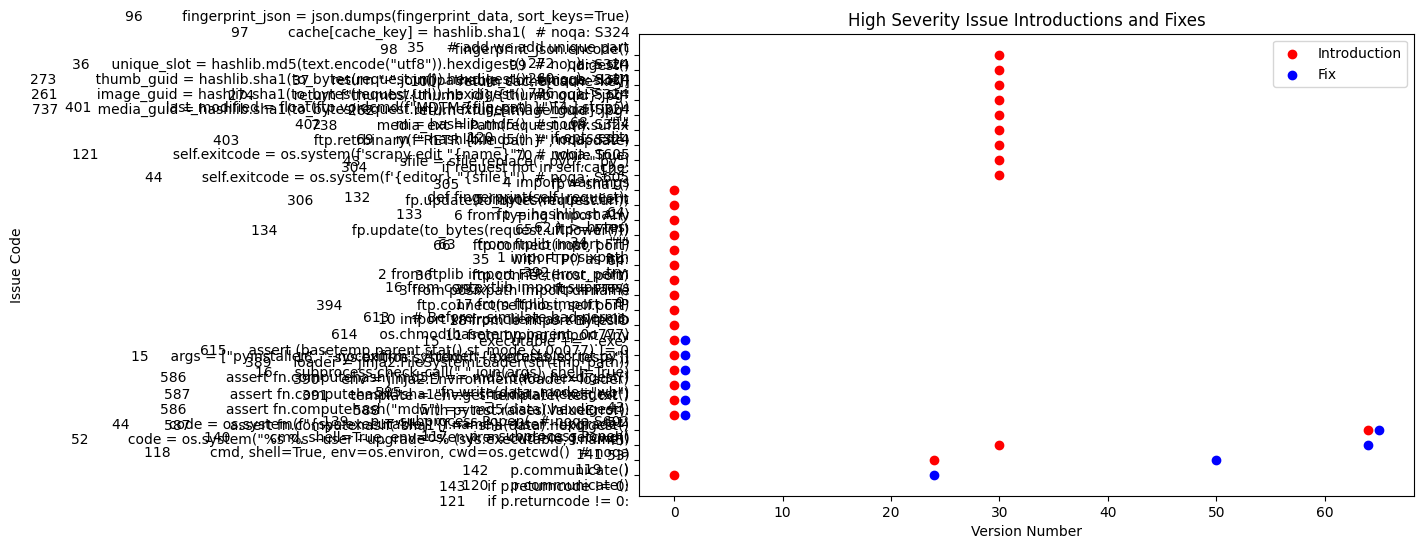

In [97]:
# Plot the issue introductions and fixes like a timeline from the above dictionaries.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(high_introductions.values(), high_introductions.keys(), color="red", label="Introduction")
plt.scatter(high_fixes.values(), high_fixes.keys(), color="blue", label="Fix")
plt.xlabel("Version Number")
plt.ylabel("Issue Code")
plt.title("High Severity Issue Introductions and Fixes")
plt.legend()
plt.show()


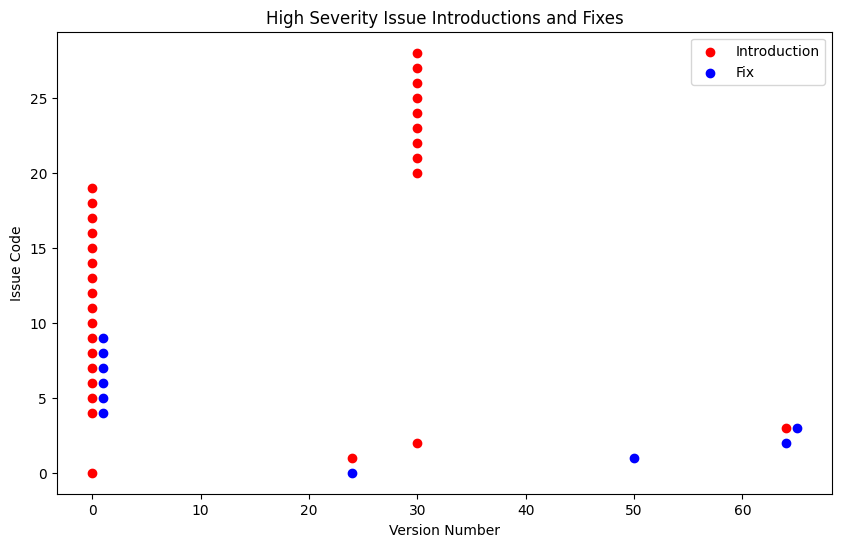

In [98]:

# Create the same plot but with the issue codes mapped to the id numbers.
plt.figure(figsize=(10, 6))
plt.scatter([version for version in high_introductions.values()], [issue_code_mapping[issue_code] for issue_code in high_introductions.keys()], color="red", label="Introduction")
plt.scatter([version for version in high_fixes.values()], [issue_code_mapping[issue_code] for issue_code in high_fixes.keys()], color="blue", label="Fix")
plt.xlabel("Version Number")
plt.ylabel("Issue Code")
plt.title("High Severity Issue Introductions and Fixes")
plt.legend()
plt.show()



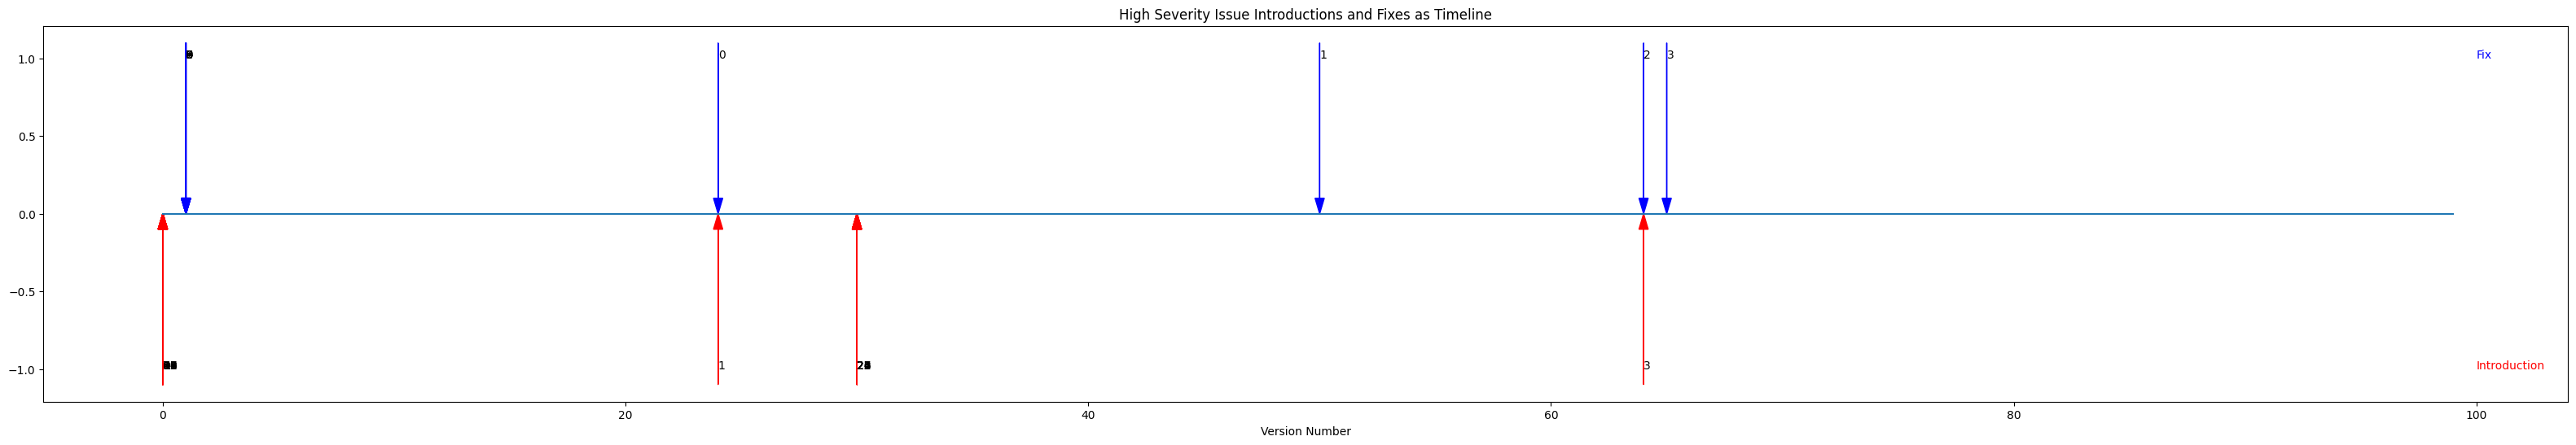

In [99]:
# Create a timeline of the issue introductions and fixes. There should be one axis for the version number and above the axis, draw arrows pointing downwards for fixes with issue id and below the axis, draw arrows pointing upwards for introductions with issue id. The issue ids should be mapped to the issue code.

plt.figure(figsize=(40, 6))
plt.plot([i for i in range(100)], [0 for _ in range(100)])
for issue_code, version in high_introductions.items():
    plt.arrow(version, -1.1, 0, 1, head_width=0.4, head_length=0.1, fc="red", ec="red")
    plt.text(version, -1, issue_code_mapping[issue_code])
for issue_code, version in high_fixes.items():
    plt.arrow(version, 1.1, 0, -1, head_width=0.4, head_length=0.1, fc="blue", ec="blue")
    plt.text(version, 1, issue_code_mapping[issue_code])

plt.xlabel("Version Number")
plt.title("High Severity Issue Introductions and Fixes as Timeline")

plt.text(100, 1, "Fix", color="blue")
plt.text(100, -1, "Introduction", color="red")
plt.show()




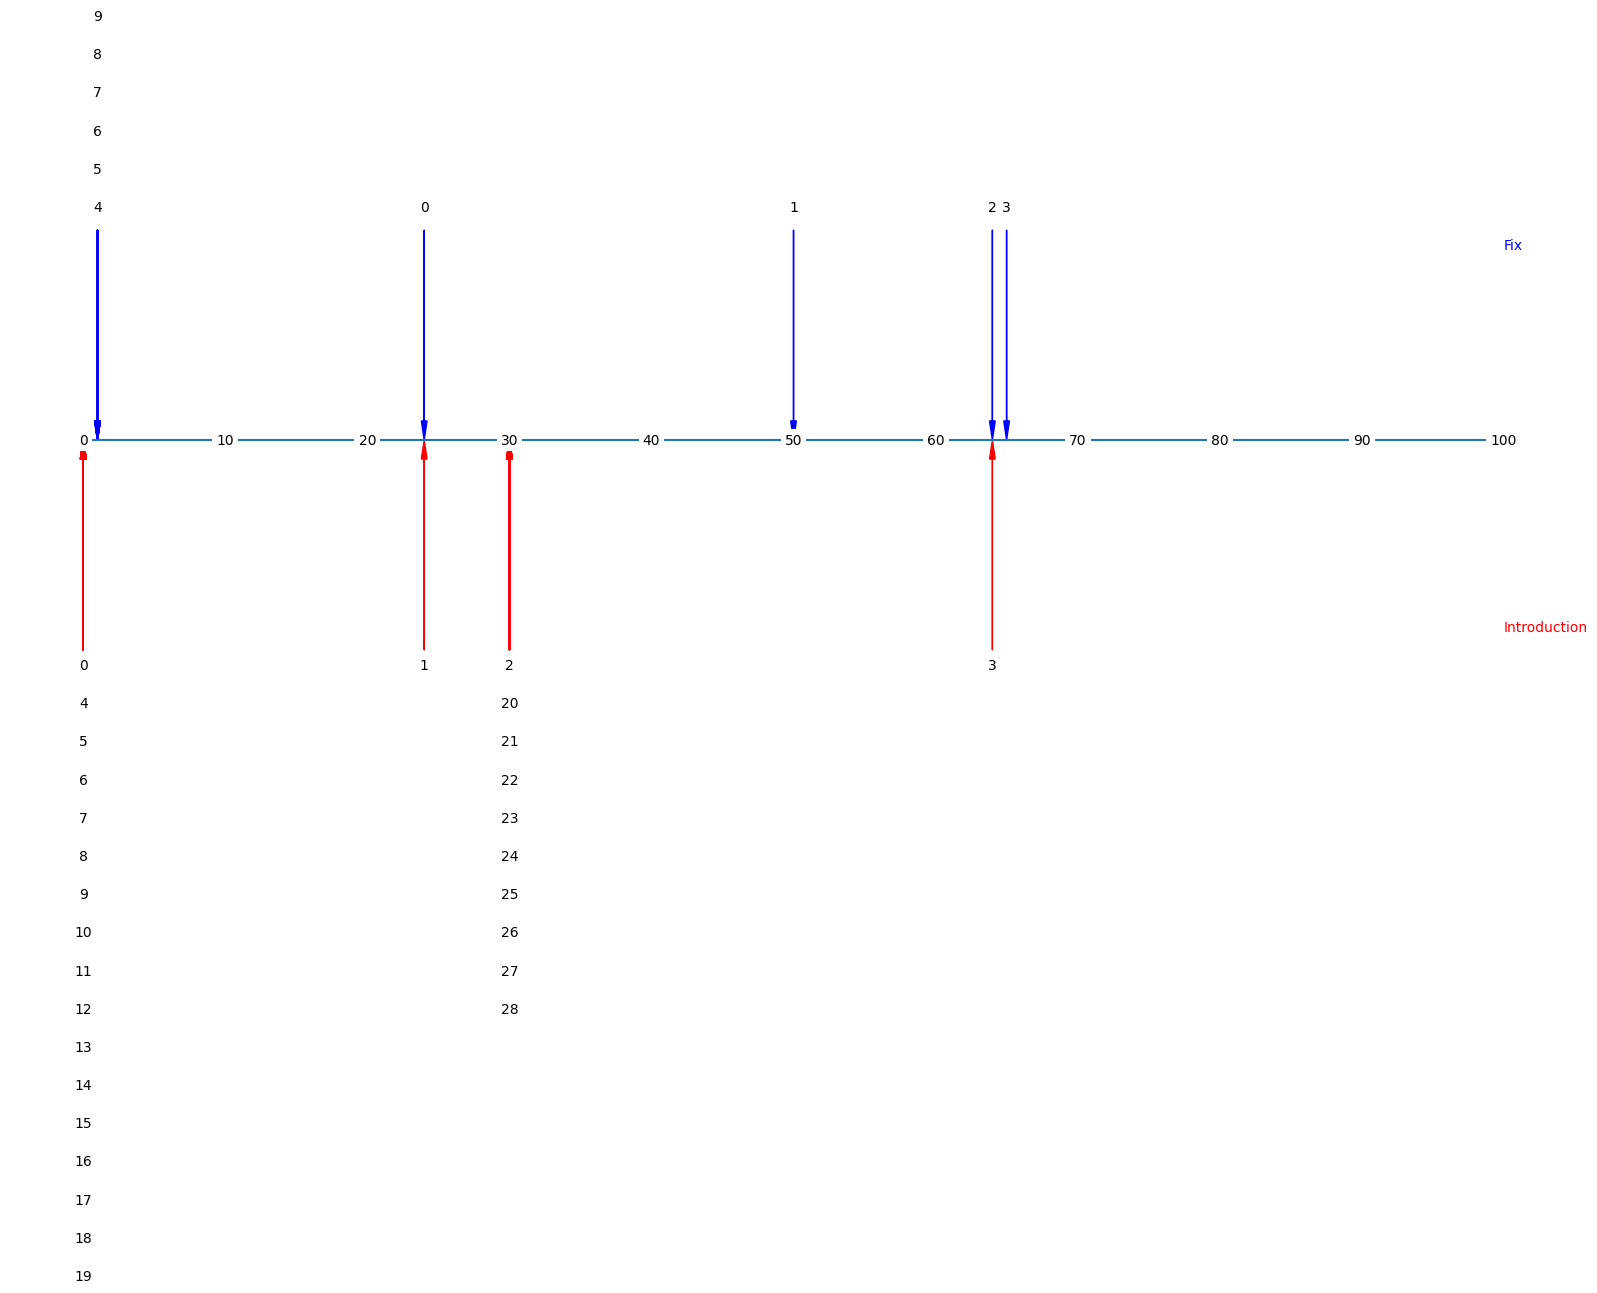

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_issue_timeline(high_introductions, high_fixes, issue_code_mapping):

    plt.figure(figsize=(20, 6))
    plt.plot([i for i in range(100)], [0 for _ in range(100)])

    # Group introductions and fixes by version
    introductions_by_version = defaultdict(list)
    fixes_by_version = defaultdict(list)

    # Add version numbers inside the timeline axis
    version_ticks = range(0, 101, 10)  # Version numbers from 0 to 100, step 10
    plt.xticks(version_ticks)
    plt.yticks([])  # Remove default y-ticks

    for tick in version_ticks:
        plt.text(tick, 0, str(tick), ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=3))


    for issue_code, version in high_introductions.items():
        introductions_by_version[version].append(issue_code)
    for issue_code, version in high_fixes.items():
        fixes_by_version[version].append(issue_code)

    # Plot introductions
    for version, issue_codes in introductions_by_version.items():
        for i, issue_code in enumerate(issue_codes):
            y_offset = -1.2 - i * 0.2  # Adjust vertical offset for overlapping IDs
            plt.arrow(version, -1.1, 0, 1, head_width=0.4, head_length=0.1, fc="red", ec="red")
            plt.text(version, y_offset, issue_code_mapping[issue_code], ha='center')

    # Plot fixes
    for version, issue_codes in fixes_by_version.items():
        for i, issue_code in enumerate(issue_codes):
            y_offset = 1.2 + i * 0.2  # Adjust vertical offset for overlapping IDs
            plt.arrow(version, 1.1, 0, -1, head_width=0.4, head_length=0.1, fc="blue", ec="blue")
            plt.text(version, y_offset, issue_code_mapping[issue_code], ha='center')

    plt.xlabel("Version Number")
    # plt.title("High Severity Issue Introductions and Fixes as Timeline")

    plt.text(100, 1, "Fix", color="blue")
    plt.text(100, -1, "Introduction", color="red")

    # Off the axis
    plt.axis('off')

    plt.show()

plot_issue_timeline(high_introductions, high_fixes, issue_code_mapping)

# RQ2

Medium Severity

100%|██████████| 100/100 [00:40<00:00,  2.47it/s]


NameError: name 'defaultdict' is not defined

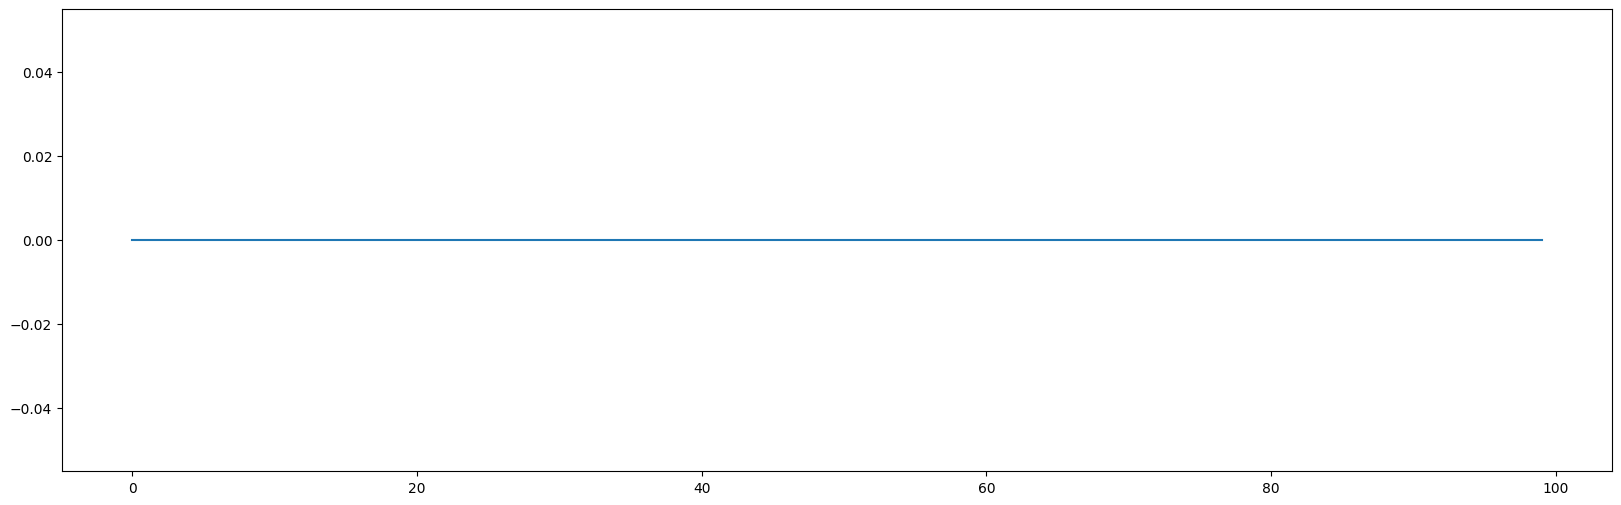

In [ ]:
# For all the repositories, across all the commits, if there a high severity issue intorduced, store the introductory commit version in the dictionary if it does not exist. If it existed and is not in the current commit, store the fixing commit version in the dictionary.
# from difflib import SequenceMatcher
import Levenshtein #https://www.geeksforgeeks.org/python-similarity-metrics-of-strings/

import tqdm

def analyze_rq1(repo_paths):

    high_introductions = {}
    high_fixes = {}

    for repo_path in repo_paths:
        for i in tqdm.tqdm(range(100)):
            filepath = os.path.join(repo_path, f"v{i}.json")
            with open(filepath, "r") as f:
                data = json.load(f)

            # for issue in data["results"]: Add tqdm
            for issue in data["results"]:
                if issue["issue_severity"] == "MEDIUM":
                    # if issue["code"] not in high_introductions:
                    #     high_introductions[issue["code"]] = i
                    # for issue_code in high_introductions.keys():
                    #     if issue_code not in high_fixes and issue_code != issue["code"] and issue["code"] in issue_code:
                    #         high_fixes[issue_code] = i
                    # Instead of using not in and in, use the similarity notion to be grater than 0.8 to consider the issue as the same.
                    # Adding to the high_introductions dictionary.
                    in_intro = False
                    for issue_code in high_introductions.keys():
                        if Levenshtein.ratio(issue_code, issue["code"]) > 0.9:
                            in_intro = True
                            break
                    if not in_intro:
                        high_introductions[issue["code"]] = i
                    # Adding to the high_fixes dictionary.
                    for issue_code in high_introductions.keys():
                        # if Levenshtein.ratio(issue_code, issue["code"]) > 0.9 and issue_code != issue["code"]:
                        #     high_fixes[issue_code] = i
                        # This condition is: if the issue code is not in the high_fixes dictionary and the issue code is not similar to any of the issue codes in the current version, then add it to the high_fixes dictionary.
                        if issue_code not in high_fixes:
                            in_fix = False
                            for issue_version in data["results"]:
                                if Levenshtein.ratio(issue_code, issue_version["code"]) > 0.9:
                                    in_fix = True
                                    break
                            if not in_fix:
                                # Check if the introduction version is less than the current version, then add it to the high_fixes dictionary.
                                if high_introductions[issue_code] < i:
                                    high_fixes[issue_code] = i
                                
                                


    return high_introductions, high_fixes

repo_paths = ["psutil_bandit", "pytest_bandit", "scrapy_bandit"]
high_introductions, high_fixes = analyze_rq1(repo_paths)

def create_issue_code_mapping(high_introductions, high_fixes):
    issue_code_mapping = {}
    for issue_code in high_introductions.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    for issue_code in high_fixes.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    return issue_code_mapping

issue_code_mapping = create_issue_code_mapping(high_introductions, high_fixes)


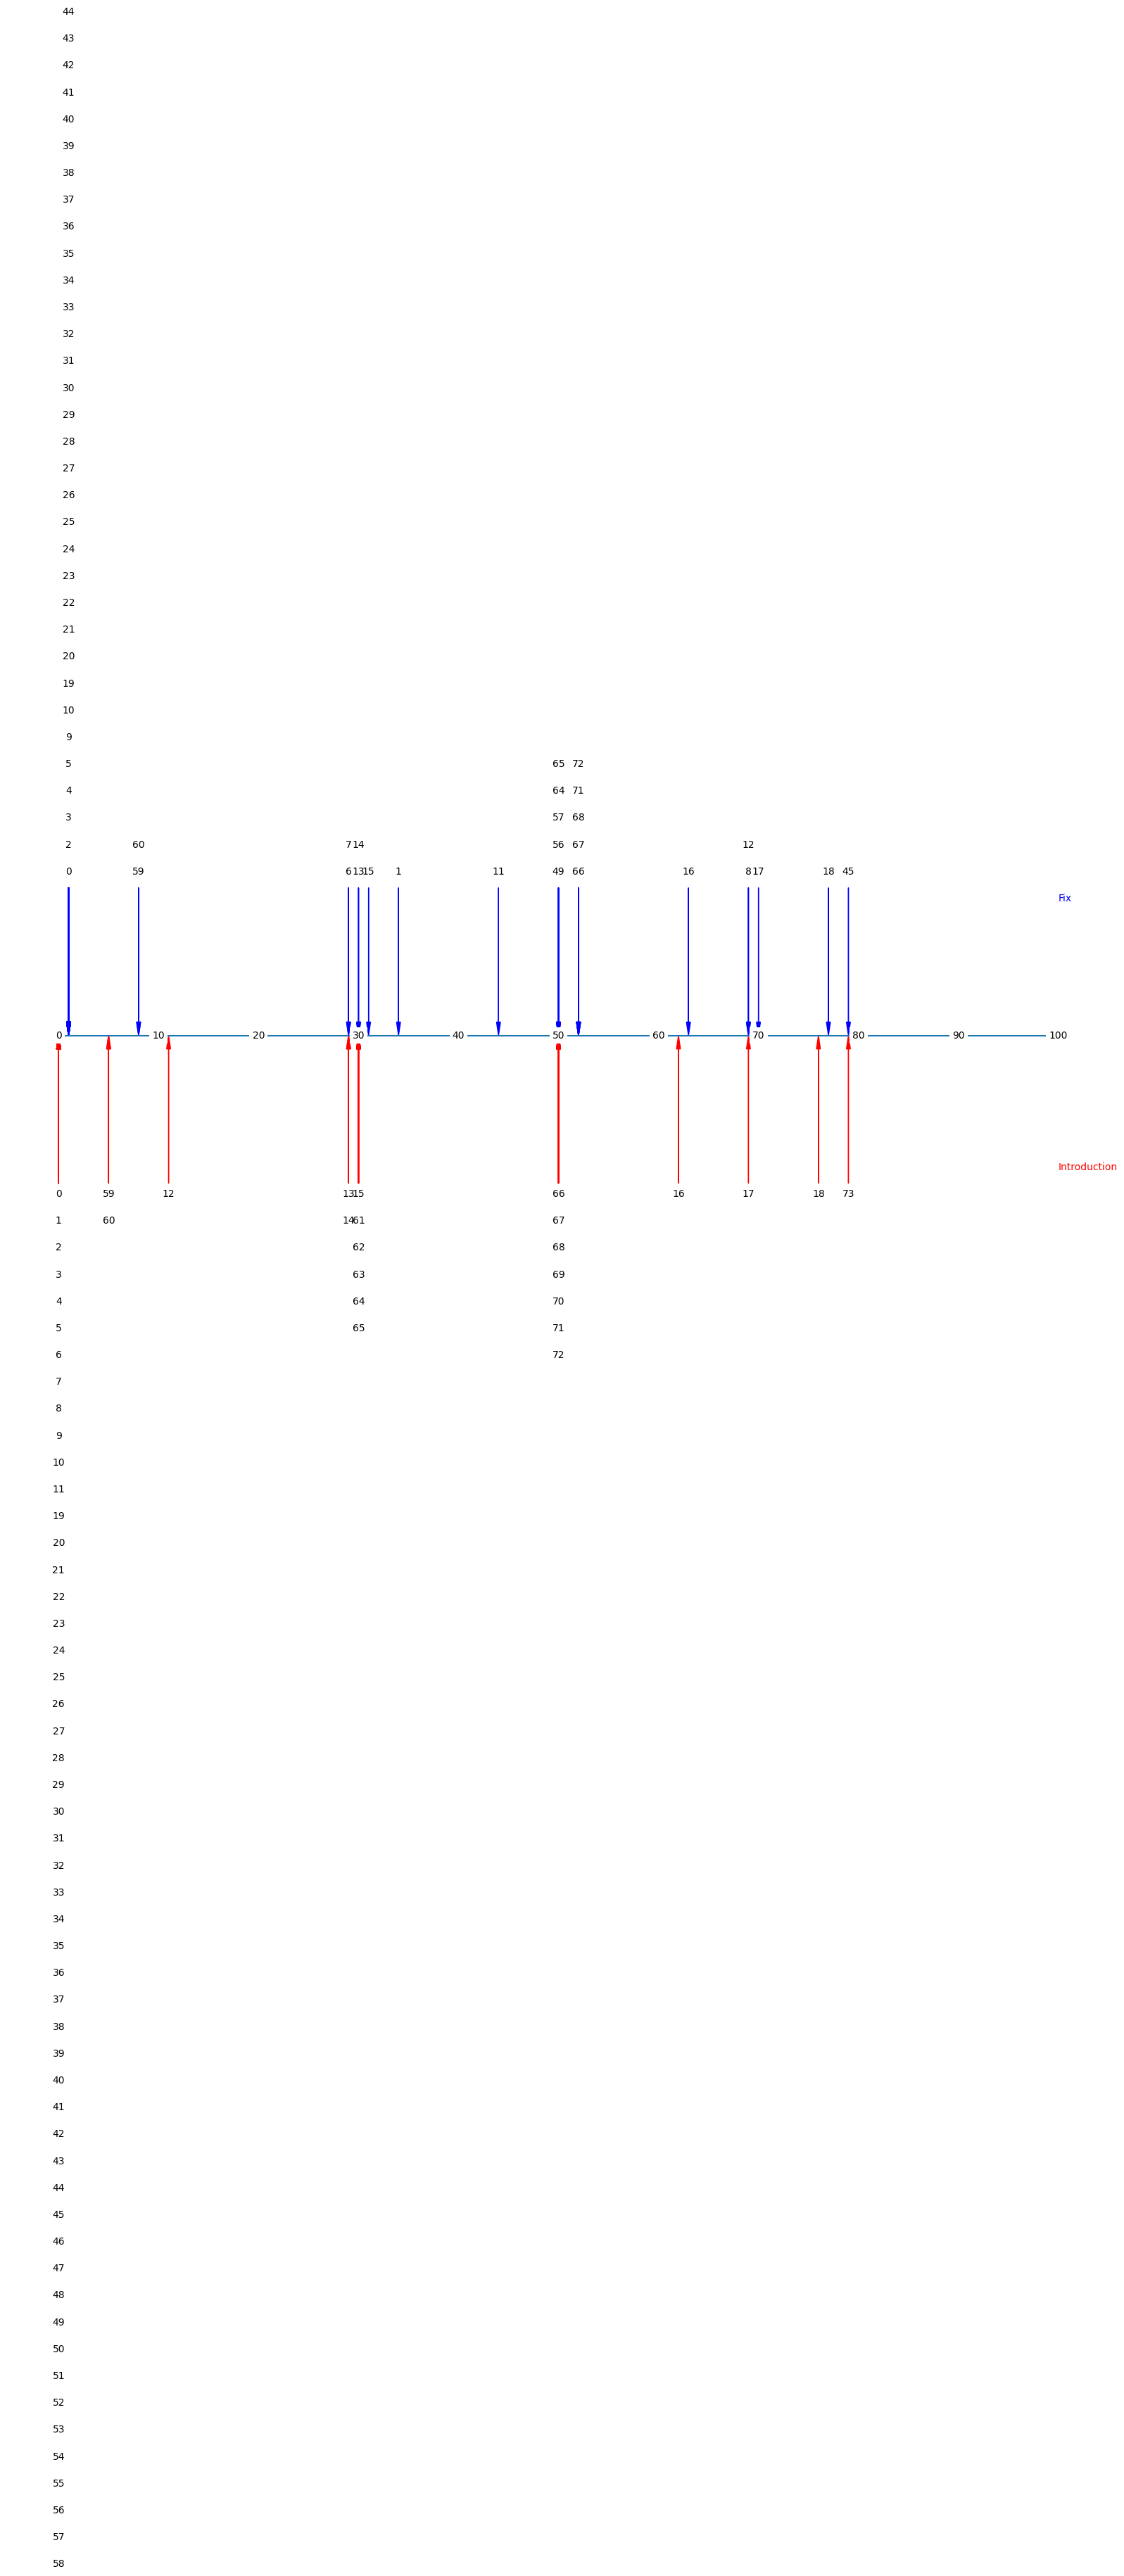

In [24]:
from collections import defaultdict
def plot_issue_timeline(high_introductions, high_fixes, issue_code_mapping):

    plt.figure(figsize=(20, 6))
    plt.plot([i for i in range(100)], [0 for _ in range(100)])

    # Group introductions and fixes by version
    introductions_by_version = defaultdict(list)
    fixes_by_version = defaultdict(list)

    # Add version numbers inside the timeline axis
    version_ticks = range(0, 101, 10)  # Version numbers from 0 to 100, step 10
    plt.xticks(version_ticks)
    plt.yticks([])  # Remove default y-ticks

    for tick in version_ticks:
        plt.text(tick, 0, str(tick), ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=3))


    for issue_code, version in high_introductions.items():
        introductions_by_version[version].append(issue_code)
    for issue_code, version in high_fixes.items():
        fixes_by_version[version].append(issue_code)

    # Plot introductions
    for version, issue_codes in introductions_by_version.items():
        for i, issue_code in enumerate(issue_codes):
            y_offset = -1.2 - i * 0.2  # Adjust vertical offset for overlapping IDs
            plt.arrow(version, -1.1, 0, 1, head_width=0.4, head_length=0.1, fc="red", ec="red")
            plt.text(version, y_offset, issue_code_mapping[issue_code], ha='center')

    # Plot fixes
    for version, issue_codes in fixes_by_version.items():
        for i, issue_code in enumerate(issue_codes):
            y_offset = 1.2 + i * 0.2  # Adjust vertical offset for overlapping IDs
            plt.arrow(version, 1.1, 0, -1, head_width=0.4, head_length=0.1, fc="blue", ec="blue")
            plt.text(version, y_offset, issue_code_mapping[issue_code], ha='center')

    plt.xlabel("Version Number")
    # plt.title("High Severity Issue Introductions and Fixes as Timeline")

    plt.text(100, 1, "Fix", color="blue")
    plt.text(100, -1, "Introduction", color="red")

    # Off the axis
    plt.axis('off')

    plt.show()

plot_issue_timeline(high_introductions, high_fixes, issue_code_mapping)


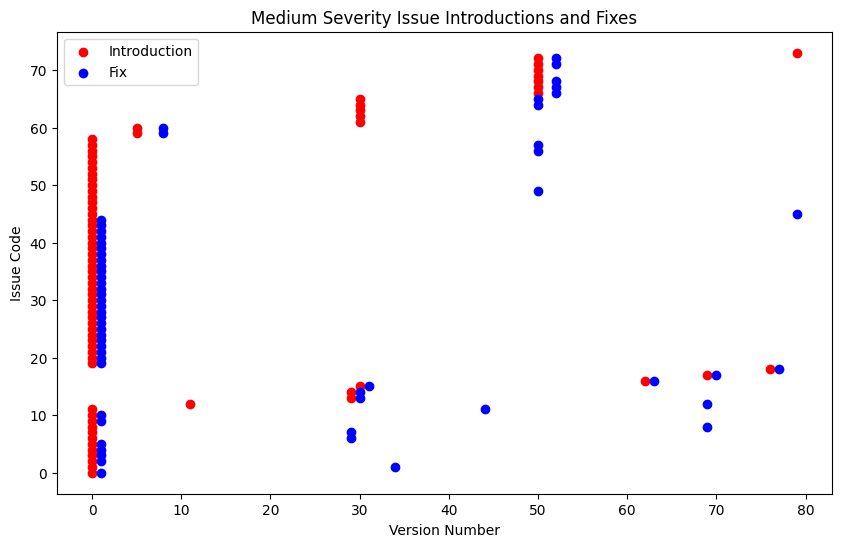

In [25]:

# Create the same plot but with the issue codes mapped to the id numbers.
plt.figure(figsize=(10, 6))
plt.scatter([version for version in high_introductions.values()], [issue_code_mapping[issue_code] for issue_code in high_introductions.keys()], color="red", label="Introduction")
plt.scatter([version for version in high_fixes.values()], [issue_code_mapping[issue_code] for issue_code in high_fixes.keys()], color="blue", label="Fix")
plt.xlabel("Version Number")
plt.ylabel("Issue Code")
plt.title("Medium Severity Issue Introductions and Fixes")
plt.legend()
plt.show()



In [40]:
# For all the repositories, across all the commits, if there a high severity issue intorduced, store the introductory commit version in the dictionary if it does not exist. If it existed and is not in the current commit, store the fixing commit version in the dictionary.
# from difflib import SequenceMatcher
import Levenshtein #https://www.geeksforgeeks.org/python-similarity-metrics-of-strings/

import tqdm

def analyze_rq1(repo_paths):

    high_introductions = {}
    high_fixes = {}

    for repo_path in repo_paths:
        for i in tqdm.tqdm(range(100)):
            filepath = os.path.join(repo_path, f"v{i}.json")
            with open(filepath, "r") as f:
                data = json.load(f)

            # for issue in data["results"]: Add tqdm
            for issue in data["results"]:
                if issue["issue_severity"] == "LOW":
                    if issue["code"] not in high_introductions:
                        high_introductions[issue["code"]] = i
                    for issue_code in high_introductions.keys():
                        if issue_code not in high_fixes and issue_code != issue["code"] and issue["code"] in issue_code:
                            high_fixes[issue_code] = i

                                
                                


    return high_introductions, high_fixes

repo_paths = ["psutil_bandit", "scrapy_bandit"]
high_introductions, high_fixes = analyze_rq1(repo_paths)

def create_issue_code_mapping(high_introductions, high_fixes):
    issue_code_mapping = {}
    for issue_code in high_introductions.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    for issue_code in high_fixes.keys():
        if issue_code not in issue_code_mapping:
            issue_code_mapping[issue_code] = len(issue_code_mapping)
    return issue_code_mapping

issue_code_mapping = create_issue_code_mapping(high_introductions, high_fixes)


100%|██████████| 100/100 [04:18<00:00,  2.59s/it]


In [41]:
len(high_introductions), len(high_fixes)

(14958, 78)

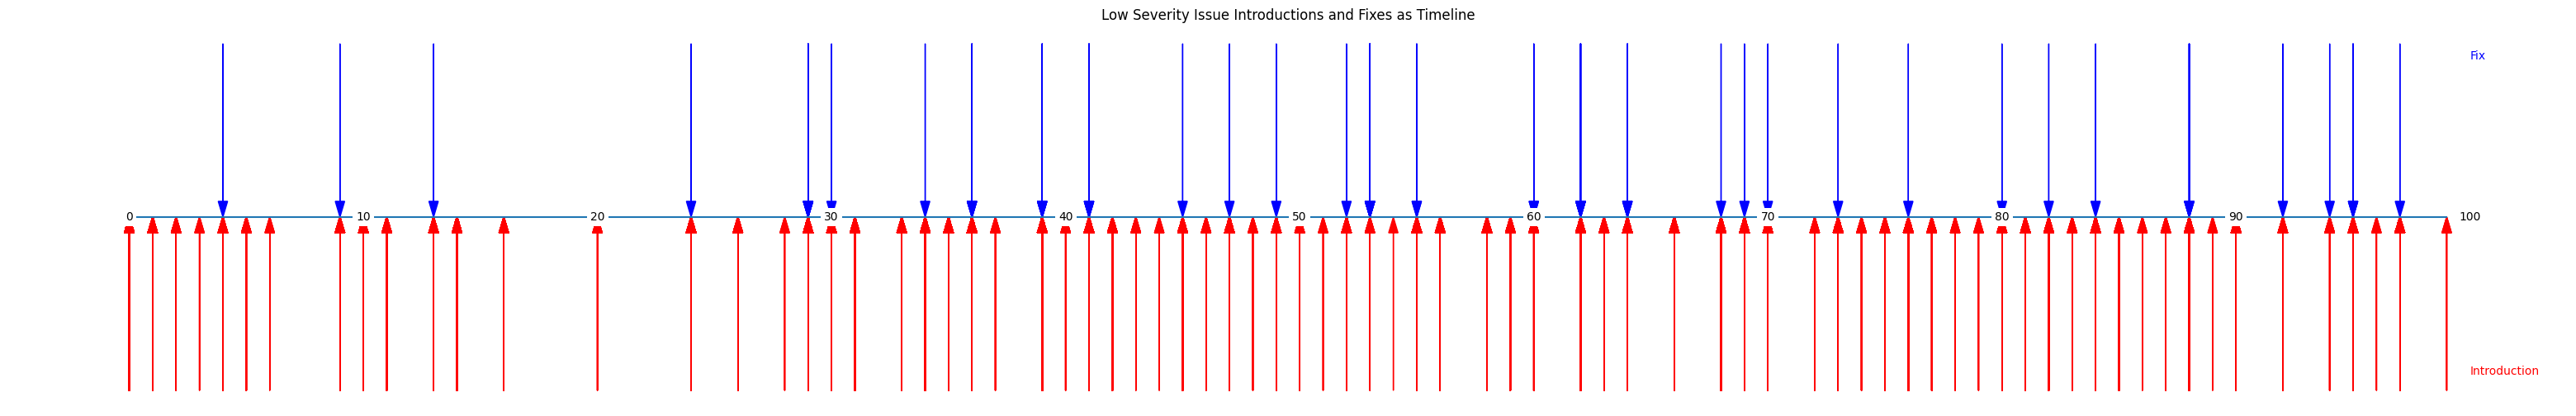

In [44]:
# Create a timeline of the issue introductions and fixes. There should be one axis for the version number and above the axis, draw arrows pointing downwards for fixes with issue id and below the axis, draw arrows pointing upwards for introductions with issue id. The issue ids should be mapped to the issue code.

plt.figure(figsize=(40, 6))
plt.plot([i for i in range(100)], [0 for _ in range(100)])

# Add version numbers inside the timeline axis
version_ticks = range(0, 101, 10)  # Version numbers from 0 to 100, step 10
plt.xticks(version_ticks)
plt.yticks([])  # Remove default y-ticks

for tick in version_ticks:
    plt.text(tick, 0, str(tick), ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=3))


for issue_code, version in high_introductions.items():
    plt.arrow(version, -1.1, 0, 1, head_width=0.4, head_length=0.1, fc="red", ec="red")

for issue_code, version in high_fixes.items():
    if version != 0:
        plt.arrow(version, 1.1, 0, -1, head_width=0.4, head_length=0.1, fc="blue", ec="blue")

plt.xlabel("Version Number")
plt.title("Low Severity Issue Introductions and Fixes as Timeline")

plt.axis('off')
plt.text(100, 1, "Fix", color="blue")
plt.text(100, -1, "Introduction", color="red")
plt.show()




# RQ3

In [1]:
# (c) RQ3 (CWE coverage): Which CWEs are the most frequent across different # OSS repositories?

# For all the repositories, across all the commits, store the CWEs in a dictionary with the CWE as the key and the number of times it has appeared as the value.
import json
import os


def analyze_rq3(repo_paths):
    
        cwe_counts = {}
    
        for repo_path in repo_paths:
            for i in range(100):
                filepath = os.path.join(repo_path, f"v{i}.json")
                with open(filepath, "r") as f:
                    data = json.load(f)
    
                for issue in data["results"]:
                    if issue["issue_cwe"]["id"] not in cwe_counts:
                        cwe_counts[issue["issue_cwe"]["id"]] = 1
                    else:
                        cwe_counts[issue["issue_cwe"]["id"]] += 1
    
        return cwe_counts

repo_paths = ["psutil_bandit", "pytest_bandit", "scrapy_bandit"]

cwe_counts = analyze_rq3(repo_paths)


In [2]:
cwe_counts

{703: 670631,
 78: 17320,
 20: 1040,
 377: 400,
 330: 2940,
 605: 300,
 502: 3390,
 259: 870,
 295: 114,
 22: 138,
 400: 100,
 327: 1348,
 94: 100,
 732: 100,
 319: 600}

In [3]:
# Convert the CWE IDs to CWE names using the CWE database and store the CWE names in the dictionary.

def convert_cwe_ids_to_names(cwe_counts):
    cwe_names = {}
    for cwe_id, count in cwe_counts.items():
        cwe_names[cwe_id] = "CWE-" + str(cwe_id)
    return cwe_names

cwe_names = convert_cwe_ids_to_names(cwe_counts)

cwe_names

{703: 'CWE-703',
 78: 'CWE-78',
 20: 'CWE-20',
 377: 'CWE-377',
 330: 'CWE-330',
 605: 'CWE-605',
 502: 'CWE-502',
 259: 'CWE-259',
 295: 'CWE-295',
 22: 'CWE-22',
 400: 'CWE-400',
 327: 'CWE-327',
 94: 'CWE-94',
 732: 'CWE-732',
 319: 'CWE-319'}

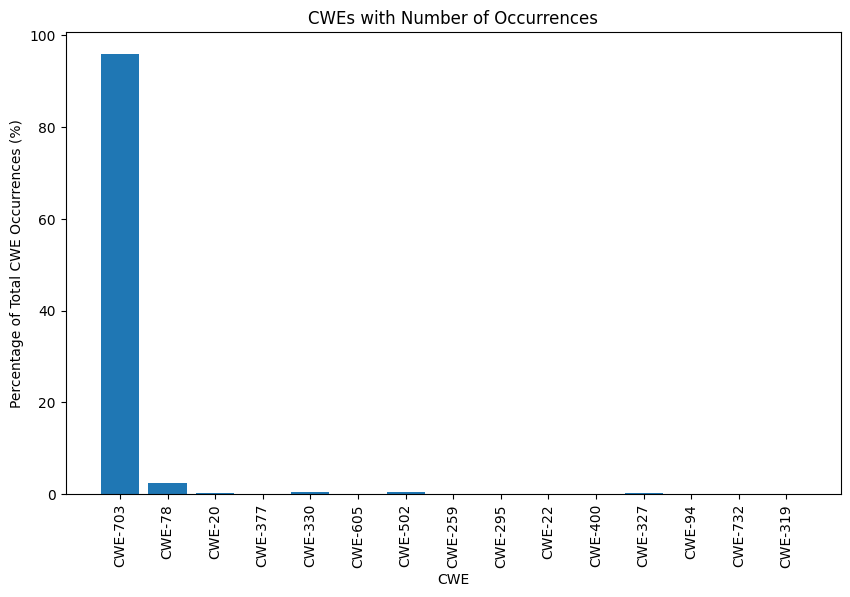

In [9]:
# Plot a bar chart of the CWEs with the number of times they have appeared.
import matplotlib.pyplot as plt

cwe_percentage = {}
total = sum(cwe_counts.values())

for cwe_id, count in cwe_counts.items():
    cwe_percentage[cwe_id] = count/total * 100


plt.figure(figsize=(10, 6))
plt.bar(cwe_names.values(), cwe_percentage.values())
plt.xticks(rotation=90)
plt.xlabel("CWE")
plt.ylabel("Percentage of Total CWE Occurrences (%)")
plt.title("CWEs with Number of Occurrences")
plt.show()


In [60]:
# Create a table of the CWEs with the number of times they have appeared.
import pandas as pd

cwe_df = pd.DataFrame({"CWE": list(cwe_names.values()), "Number of Occurrences": list(cwe_counts.values())})

cwe_df

CWE  Number of Occurrences
0   CWE-703                 670631
1    CWE-78                  17320
2    CWE-20                   1040
3   CWE-377                    400
4   CWE-330                   2940
5   CWE-605                    300
6   CWE-502                   3390
7   CWE-259                    870
8   CWE-295                    114
9    CWE-22                    138
10  CWE-400                    100
11  CWE-327                   1348
12   CWE-94                    100
13  CWE-732                    100
14  CWE-319                    600

In [8]:
import pandas as pd
# DF of percentage of CWEs
cwe_percentage_df = pd.DataFrame({"CWE": list(cwe_names.values()), "Percentage of Total CWE Occurrences": list(cwe_percentage.values())})

cwe_percentage_df

CWE  Percentage of Total CWE Occurrences
0   CWE-703                            95.887851
1    CWE-78                             2.476440
2    CWE-20                             0.148701
3   CWE-377                             0.057193
4   CWE-330                             0.420366
5   CWE-605                             0.042894
6   CWE-502                             0.484707
7   CWE-259                             0.124394
8   CWE-295                             0.016300
9    CWE-22                             0.019731
10  CWE-400                             0.014298
11  CWE-327                             0.192739
12   CWE-94                             0.014298
13  CWE-732                             0.014298
14  CWE-319                             0.085789

Percentage of Total CWE Occurrences
95.887851
2.476440
0.148701
0.057193
0.420366
0.042894
0.484707
0.124394
0.016300
0.019731
0.014298
0.192739
0.014298
0.014298
0.085789

CWE-ID 
CWE-703
CWE-78
CWE-20
CWE-377
CWE-330
CWE-605
CWE-502
CWE-259
CWE-295
CWE-22
CWE-400
CWE-327
CWE-94
CWE-732
CWE-319

In [10]:
# Plot a Pie chart with Bar chart. for the CWE percentage more than 0.1%, show on pie chart. for the others show on bar chart mapping to the pie chart location.

cwe_percentage_df = cwe_percentage_df.sort_values(by="Percentage of Total CWE Occurrences", ascending=False)

cwe_percentage_df

CWE  Percentage of Total CWE Occurrences
0   CWE-703                            95.887851
1    CWE-78                             2.476440
6   CWE-502                             0.484707
4   CWE-330                             0.420366
11  CWE-327                             0.192739
2    CWE-20                             0.148701
7   CWE-259                             0.124394
14  CWE-319                             0.085789
3   CWE-377                             0.057193
5   CWE-605                             0.042894
9    CWE-22                             0.019731
8   CWE-295                             0.016300
10  CWE-400                             0.014298
12   CWE-94                             0.014298
13  CWE-732                             0.014298